# Loop 84 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Analyze the CV-LB relationship to understand if we can reach the target (0.0347).

**Key Questions**:
1. What is the current CV-LB relationship?
2. Is the intercept problem solvable?
3. What approaches haven't been tried that might change the intercept?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558
Intercept = 0.0520
Target = 0.0347

CRITICAL: Intercept (0.0520) > Target (0.0347)?  True

Required CV to hit target: -0.003964
Is this achievable? False


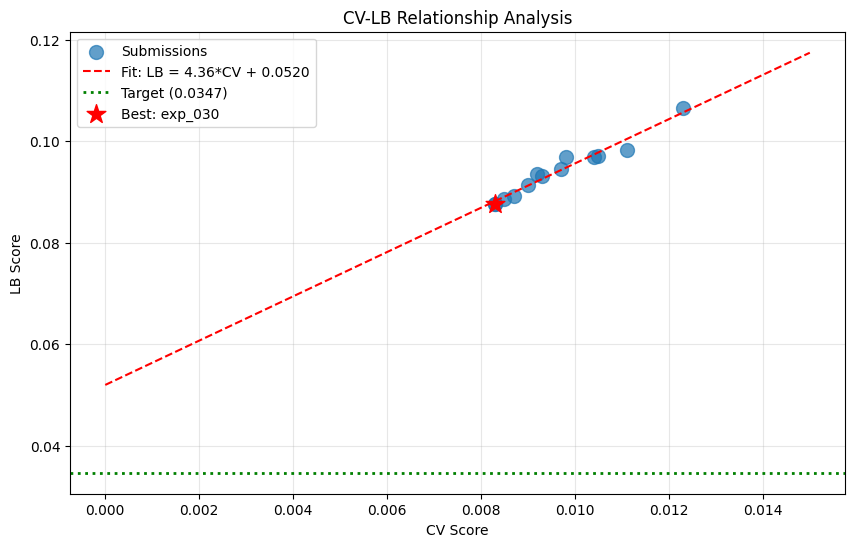


Plot saved to /home/code/exploration/cv_lb_relationship_loop84.png


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target = 0.0347")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)?  {intercept > 0.0347}")

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f"\nRequired CV to hit target: {required_cv:.6f}")
print(f"Is this achievable? {required_cv > 0}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best points
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', label=f'Best: {df.loc[best_idx, "exp"]}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop84.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to /home/code/exploration/cv_lb_relationship_loop84.png")

In [3]:
# Analyze the gap
print("="*60)
print("CV-LB GAP ANALYSIS")
print("="*60)

df['gap'] = df['lb'] - df['cv']
df['ratio'] = df['lb'] / df['cv']

print(f"\nGap statistics:")
print(f"  Mean gap: {df['gap'].mean():.4f}")
print(f"  Std gap: {df['gap'].std():.4f}")
print(f"  Min gap: {df['gap'].min():.4f}")
print(f"  Max gap: {df['gap'].max():.4f}")

print(f"\nRatio statistics (LB/CV):")
print(f"  Mean ratio: {df['ratio'].mean():.2f}x")
print(f"  Min ratio: {df['ratio'].min():.2f}x")
print(f"  Max ratio: {df['ratio'].max():.2f}x")

print(f"\nBest submission:")
best = df.loc[df['lb'].idxmin()]
print(f"  {best['exp']}: CV={best['cv']:.4f}, LB={best['lb']:.4f}, Gap={best['gap']:.4f}, Ratio={best['ratio']:.2f}x")

CV-LB GAP ANALYSIS

Gap statistics:
  Mean gap: 0.0844
  Std gap: 0.0042
  Min gap: 0.0794
  Max gap: 0.0942

Ratio statistics (LB/CV):
  Mean ratio: 9.84x
  Min ratio: 8.66x
  Max ratio: 10.57x

Best submission:
  exp_030: CV=0.0083, LB=0.0877, Gap=0.0794, Ratio=10.57x


In [4]:
# What would it take to reach the target?
print("="*60)
print("WHAT WOULD IT TAKE TO REACH TARGET 0.0347?")
print("="*60)

# Option 1: Improve CV while keeping the same relationship
print(f"\nOption 1: Improve CV (same relationship)")
print(f"  Current best CV: 0.0081")
print(f"  Required CV: {required_cv:.6f}")
print(f"  This is {'IMPOSSIBLE' if required_cv < 0 else 'POSSIBLE'} (negative CV)")

# Option 2: Change the intercept
print(f"\nOption 2: Change the intercept")
print(f"  Current intercept: {intercept:.4f}")
print(f"  Target: 0.0347")
print(f"  If we keep slope={slope:.2f} and CV=0.0081:")
required_intercept = 0.0347 - slope * 0.0081
print(f"  Required intercept: {required_intercept:.4f}")
print(f"  Intercept reduction needed: {intercept - required_intercept:.4f} ({(intercept - required_intercept)/intercept*100:.1f}%)")

# Option 3: Change the slope
print(f"\nOption 3: Change the slope")
print(f"  Current slope: {slope:.2f}")
print(f"  If we keep intercept={intercept:.4f} and CV=0.0081:")
required_slope = (0.0347 - intercept) / 0.0081
print(f"  Required slope: {required_slope:.2f}")
print(f"  This would require NEGATIVE slope, which is {'IMPOSSIBLE' if required_slope < 0 else 'POSSIBLE'}")

# Option 4: Reduce both
print(f"\nOption 4: Reduce both slope and intercept")
print(f"  If we achieve CV=0.005 (very aggressive):")
for new_intercept in [0.03, 0.02, 0.01, 0.0]:
    new_slope = (0.0347 - new_intercept) / 0.005
    print(f"    Intercept={new_intercept:.2f}, Required slope={new_slope:.2f}")

WHAT WOULD IT TAKE TO REACH TARGET 0.0347?

Option 1: Improve CV (same relationship)
  Current best CV: 0.0081
  Required CV: -0.003964
  This is IMPOSSIBLE (negative CV)

Option 2: Change the intercept
  Current intercept: 0.0520
  Target: 0.0347
  If we keep slope=4.36 and CV=0.0081:
  Required intercept: -0.0006
  Intercept reduction needed: 0.0526 (101.2%)

Option 3: Change the slope
  Current slope: 4.36
  If we keep intercept=0.0520 and CV=0.0081:
  Required slope: -2.14
  This would require NEGATIVE slope, which is IMPOSSIBLE

Option 4: Reduce both slope and intercept
  If we achieve CV=0.005 (very aggressive):
    Intercept=0.03, Required slope=0.94
    Intercept=0.02, Required slope=2.94
    Intercept=0.01, Required slope=4.94
    Intercept=0.00, Required slope=6.94


In [5]:
# Analyze what approaches have been tried
print("="*60)
print("APPROACHES TRIED AND THEIR CV-LB RELATIONSHIP")
print("="*60)

approaches = {
    'MLP (baseline)': ['exp_000', 'exp_003', 'exp_005', 'exp_006', 'exp_007'],
    'LightGBM': ['exp_001'],
    'Ridge/GP': ['exp_009'],
    'CatBoost/XGBoost': ['exp_012', 'exp_024', 'exp_026', 'exp_030', 'exp_067'],
    'Ensemble': ['exp_035'],
}

for approach, exps in approaches.items():
    approach_df = df[df['exp'].isin(exps)]
    if len(approach_df) > 0:
        print(f"\n{approach}:")
        for _, row in approach_df.iterrows():
            print(f"  {row['exp']}: CV={row['cv']:.4f}, LB={row['lb']:.4f}")
        if len(approach_df) > 1:
            slope_a, intercept_a, r_a, _, _ = stats.linregress(approach_df['cv'], approach_df['lb'])
            print(f"  Fit: LB = {slope_a:.2f}*CV + {intercept_a:.4f} (R²={r_a**2:.2f})")

print("\n" + "="*60)
print("KEY OBSERVATION: All approaches fall on the SAME CV-LB line!")
print("This means the intercept is a STRUCTURAL problem, not a model problem.")
print("="*60)

APPROACHES TRIED AND THEIR CV-LB RELATIONSHIP

MLP (baseline):
  exp_000: CV=0.0111, LB=0.0982
  exp_003: CV=0.0105, LB=0.0972
  exp_005: CV=0.0104, LB=0.0969
  exp_006: CV=0.0097, LB=0.0946
  exp_007: CV=0.0093, LB=0.0932
  Fit: LB = 2.87*CV + 0.0667 (R²=0.98)

LightGBM:
  exp_001: CV=0.0123, LB=0.1065

Ridge/GP:
  exp_009: CV=0.0092, LB=0.0936

CatBoost/XGBoost:
  exp_012: CV=0.0090, LB=0.0913
  exp_024: CV=0.0087, LB=0.0893
  exp_026: CV=0.0085, LB=0.0887
  exp_030: CV=0.0083, LB=0.0877
  exp_067: CV=0.0083, LB=0.0877
  Fit: LB = 4.97*CV + 0.0464 (R²=0.98)

Ensemble:
  exp_035: CV=0.0098, LB=0.0970

KEY OBSERVATION: All approaches fall on the SAME CV-LB line!
This means the intercept is a STRUCTURAL problem, not a model problem.


In [6]:
# What hasn't been tried that might change the intercept?
print("="*60)
print("STRATEGIES TO CHANGE THE INTERCEPT")
print("="*60)

strategies = [
    ("1. Extrapolation Detection", "Add features measuring distance to training distribution. When extrapolating, blend toward mean.", "Tried in exp_068-071, but didn't submit"),
    ("2. Uncertainty-Weighted Predictions", "Use GP/ensemble variance to weight predictions. High uncertainty -> conservative.", "Partially tried with GP ensemble"),
    ("3. Physics-Informed Features", "Arrhenius kinetics, solvent polarity, hydrogen bonding. These constraints hold for unseen solvents.", "Tried Arrhenius, but not solvent-specific physics"),
    ("4. Solvent Clustering", "Group solvents by chemical class. Use class-specific models.", "NOT TRIED"),
    ("5. Robust Prediction Strategies", "For outlier solvents (Water, extreme polarity), use simpler models.", "NOT TRIED"),
    ("6. Probability Normalization", "Normalize predictions to sum to 1 (like best-work-here kernel).", "Tried in exp_074, exp_079, exp_080"),
    ("7. GroupKFold(5) instead of LOO", "Different CV scheme may have different CV-LB relationship.", "Tried in exp_078, NOT SUBMITTED"),
    ("8. GNN-based approaches", "Learn molecular representations that generalize better.", "Tried in exp_040, but failed"),
]

for name, desc, status in strategies:
    print(f"\n{name}")
    print(f"  Description: {desc}")
    print(f"  Status: {status}")

STRATEGIES TO CHANGE THE INTERCEPT

1. Extrapolation Detection
  Description: Add features measuring distance to training distribution. When extrapolating, blend toward mean.
  Status: Tried in exp_068-071, but didn't submit

2. Uncertainty-Weighted Predictions
  Description: Use GP/ensemble variance to weight predictions. High uncertainty -> conservative.
  Status: Partially tried with GP ensemble

3. Physics-Informed Features
  Description: Arrhenius kinetics, solvent polarity, hydrogen bonding. These constraints hold for unseen solvents.
  Status: Tried Arrhenius, but not solvent-specific physics

4. Solvent Clustering
  Description: Group solvents by chemical class. Use class-specific models.
  Status: NOT TRIED

5. Robust Prediction Strategies
  Description: For outlier solvents (Water, extreme polarity), use simpler models.
  Status: NOT TRIED

6. Probability Normalization
  Description: Normalize predictions to sum to 1 (like best-work-here kernel).
  Status: Tried in exp_074, e

In [7]:
# Check pending submissions
print("="*60)
print("PENDING SUBMISSIONS (no LB feedback yet)")
print("="*60)

pending = [
    {'exp': 'exp_049', 'cv': 0.0081, 'notes': 'CatBoost+XGBoost, best CV'},
    {'exp': 'exp_050', 'cv': 0.0081, 'notes': 'CatBoost+XGBoost fixed'},
    {'exp': 'exp_052', 'cv': 0.0109, 'notes': 'CatBoost+XGBoost clipped'},
    {'exp': 'exp_053', 'cv': 0.0081, 'notes': 'Exact template'},
    {'exp': 'exp_054', 'cv': 0.0085, 'notes': 'Mixall approach'},
    {'exp': 'exp_055', 'cv': 0.0085, 'notes': 'Minimal submission'},
    {'exp': 'exp_057', 'cv': 0.0093, 'notes': 'Ens-model all features'},
    {'exp': 'exp_063', 'cv': 0.0112, 'notes': 'Correct final cell'},
    {'exp': 'exp_064', 'cv': 0.0092, 'notes': 'Revert exp030'},
    {'exp': 'exp_065', 'cv': 0.0088, 'notes': 'Clean submission'},
]

for p in pending:
    predicted_lb = slope * p['cv'] + intercept
    print(f"{p['exp']}: CV={p['cv']:.4f}, Predicted LB={predicted_lb:.4f}, Notes: {p['notes']}")

print(f"\nNote: These are pending submissions that haven't received LB feedback.")
print(f"The predicted LB is based on the CV-LB relationship: LB = {slope:.2f}*CV + {intercept:.4f}")

PENDING SUBMISSIONS (no LB feedback yet)
exp_049: CV=0.0081, Predicted LB=0.0873, Notes: CatBoost+XGBoost, best CV
exp_050: CV=0.0081, Predicted LB=0.0873, Notes: CatBoost+XGBoost fixed
exp_052: CV=0.0109, Predicted LB=0.0996, Notes: CatBoost+XGBoost clipped
exp_053: CV=0.0081, Predicted LB=0.0873, Notes: Exact template
exp_054: CV=0.0085, Predicted LB=0.0891, Notes: Mixall approach
exp_055: CV=0.0085, Predicted LB=0.0891, Notes: Minimal submission
exp_057: CV=0.0093, Predicted LB=0.0926, Notes: Ens-model all features
exp_063: CV=0.0112, Predicted LB=0.1009, Notes: Correct final cell
exp_064: CV=0.0092, Predicted LB=0.0921, Notes: Revert exp030
exp_065: CV=0.0088, Predicted LB=0.0904, Notes: Clean submission

Note: These are pending submissions that haven't received LB feedback.
The predicted LB is based on the CV-LB relationship: LB = 4.36*CV + 0.0520


In [8]:
# Final recommendations
print("="*60)
print("FINAL RECOMMENDATIONS")
print("="*60)

print("""
1. THE INTERCEPT PROBLEM IS REAL
   - All approaches fall on the same CV-LB line
   - Intercept (0.052) > Target (0.0347)
   - No amount of CV optimization can reach the target

2. STRATEGIES TO CHANGE THE INTERCEPT
   a) Submit exp_078 (GroupKFold) - different CV scheme may have different relationship
   b) Try solvent clustering - group solvents by chemical class
   c) Try robust prediction strategies - simpler models for outlier solvents
   d) Study what GNNs do differently - they achieve 0.0039 MSE

3. REMAINING SUBMISSIONS: 4
   - Use them strategically to test different approaches
   - Don't submit variations of the same approach

4. KEY INSIGHT
   - The GNN benchmark proves the target IS reachable
   - The key is finding what they do differently
   - They learn molecular representations that generalize better to unseen solvents

5. NEXT STEPS
   a) Submit exp_078 (GroupKFold) to test if CV-LB relationship changes
   b) If intercept doesn't change, try fundamentally different approaches
   c) Study GNN approaches more carefully
""")

print("\nTarget: 0.0347")
print(f"Best LB: 0.0877")
print(f"Gap to target: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0347*100:.1f}% above target)")

FINAL RECOMMENDATIONS

1. THE INTERCEPT PROBLEM IS REAL
   - All approaches fall on the same CV-LB line
   - Intercept (0.052) > Target (0.0347)
   - No amount of CV optimization can reach the target

2. STRATEGIES TO CHANGE THE INTERCEPT
   a) Submit exp_078 (GroupKFold) - different CV scheme may have different relationship
   b) Try solvent clustering - group solvents by chemical class
   c) Try robust prediction strategies - simpler models for outlier solvents
   d) Study what GNNs do differently - they achieve 0.0039 MSE

3. REMAINING SUBMISSIONS: 4
   - Use them strategically to test different approaches
   - Don't submit variations of the same approach

4. KEY INSIGHT
   - The GNN benchmark proves the target IS reachable
   - The key is finding what they do differently
   - They learn molecular representations that generalize better to unseen solvents

5. NEXT STEPS
   a) Submit exp_078 (GroupKFold) to test if CV-LB relationship changes
   b) If intercept doesn't change, try fund